### Task 01:
Your objective is to implement the K-Nearest Neighbors (KNN) algorithm
with k=3. Use this algorithm to predict the income value, with the given
input value X=22.

Final Task: Generate an Excel spreadsheet for a provided dataset. <br>
• Use Python programming to validate the KNN calculations. <br>
• Additionally, compare the predicted outcomes of the KNN algorithm with Linear Regression results. <br> <br>

Please note that for validating your manual calculations, you should
employ the entire dataset. There is no need to divide the dataset into
training and testing sets.

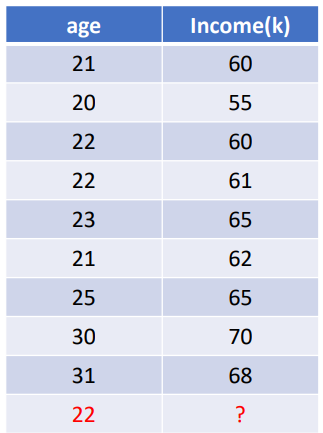

### Solution: 

In [1]:
# Import Pandas Library to load CSV data
import pandas as pd

In [2]:
#Load CSV
df = pd.read_csv("data\income.csv", sep=',')
df.head()

,age,Income(k)
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65


### EDA

In [3]:
df.shape # row, col

(9, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9 non-null      int64
 1   Income(k)  9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [5]:
#missing checking
df.isnull().sum()

age          0
Income(k)    0
dtype: int64

In [6]:
df['age'].head()

0    21
1    20
2    22
3    22
4    23
Name: age, dtype: int64

In [7]:
df[['Income(k)']].head()

,Income(k)
0,60
1,55
2,60
3,61
4,65


Text(0.5, 1.0, 'Age vs Income Analysis')

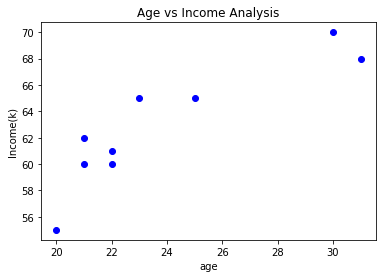

In [8]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['age'], df['Income(k)'], color='blue')
plt.xlabel('age')
plt.ylabel('Income(k)')
plt.title('Age vs Income Analysis')

In [9]:
df.head()

,age,Income(k)
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65


In [10]:
x = df['age'] #1d
y = df['Income(k)']

### Solution:1 Linear Reagression - Manual Calculation

In [11]:
import numpy as np

In [12]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [13]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [14]:
coefficient = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 
coefficient

1.0155172413793103

In [15]:
intercept = mean_y - (coefficient * mean_x)

#### Predict income for 22 age

In [16]:
pred_y = (coefficient * 22) + intercept
pred_y

60.970689655172414

In [17]:
pred_22_manual = pred_y
pred_22_manual

60.970689655172414

In [18]:
df.head()

,age,Income(k)
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65


#### Train Test Spilt

In [19]:
# Load Library
from sklearn.model_selection import train_test_split

In [20]:
# 30% test, 70% train data
xtrain, xtest, ytrain, ytest = train_test_split(df[['age']], y, test_size=.30, random_state=42)

In [21]:
xtrain.head()

,age
0,21
8,31
2,22
4,23
3,22


In [22]:
xtest.head()

,age
7,30
1,20
5,21


### Solution-2: Linear Reagression - Using sklearn.linear_model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression()

In [25]:
#training model
reg.fit(xtrain, ytrain) 

LinearRegression()

In [26]:
reg.coef_

array([0.79411765])

In [27]:
reg.intercept_

44.1078431372549

In [28]:
m = reg.coef_
c = reg.intercept_
m*22 + c

array([61.57843137])

#### Predict income for 22 age

In [29]:
pred_22_linear_model = reg.predict([[22]])
pred_22_linear_model

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.57843137])

In [30]:
# corrsponding to ytest(actual)
reg.predict(xtest) 

array([67.93137255, 59.99019608, 60.78431373])

In [31]:
#testing accuracy score
reg.score(xtest, ytest) 

0.7278771933416603

In [32]:
#training accuracy score
reg.score(xtrain, ytrain) 

0.7820489898086898

In [33]:
df['predicted_income'] = reg.predict(df[['age']])

In [34]:
df.head()

,age,Income(k),predicted_income
0,21,60,60.784314
1,20,55,59.990196
2,22,60,61.578431
3,22,61,61.578431
4,23,65,62.372549


In [35]:
df['residiuls'] = df['Income(k)'] - df['predicted_income']

In [36]:
df.head()

,age,Income(k),predicted_income,residiuls
0,21,60,60.784314,-0.784314
1,20,55,59.990196,-4.990196
2,22,60,61.578431,-1.578431
3,22,61,61.578431,-0.578431
4,23,65,62.372549,2.627451


In [37]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['age'], df['predicted_income'])

In [38]:
mse

1536.4272715622194

In [39]:
#RMSE
import math
math.sqrt(mse)

39.19728653315455

Text(0.5, 1.0, 'Age vs Income Analysis')

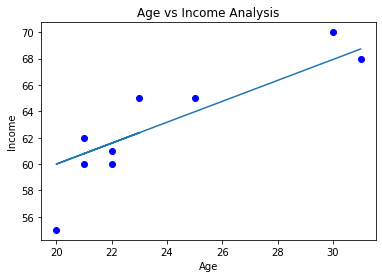

In [40]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_income'])
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['age'], df['Income(k)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Analysis')

### Solution-3: Linear Reagression - Using KNN algorithm 

In [41]:
# Import Model
from sklearn.neighbors import KNeighborsRegressor

In [42]:
# Create instance
model = KNeighborsRegressor(n_neighbors=2)

In [43]:
model.fit(xtrain, ytrain) 

KNeighborsRegressor(n_neighbors=2)

In [44]:
# Predit
pred_22_knn_model = model.predict([[22]])
pred_22_knn_model

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([60.5])

In [45]:
# corrsponding to ytest(actual)
reg.predict(xtest) 

array([67.93137255, 59.99019608, 60.78431373])

In [46]:
#testing accuracy score
reg.score(xtest, ytest) 

0.7278771933416603

In [47]:
#training accuracy score
reg.score(xtrain, ytrain) 

0.7820489898086898

In [48]:
df['predicted_income_knn'] = model.predict(df[['age']])

In [49]:
df['residiuls_knn'] = df['Income(k)'] - df['predicted_income_knn']

In [50]:
df.head()

,age,Income(k),predicted_income,residiuls,predicted_income_knn,residiuls_knn
0,21,60,60.784314,-0.784314,60.0,0.0
1,20,55,59.990196,-4.990196,60.0,-5.0
2,22,60,61.578431,-1.578431,60.5,-0.5
3,22,61,61.578431,-0.578431,60.5,0.5
4,23,65,62.372549,2.627451,62.5,2.5


Text(0.5, 1.0, 'Age vs Income Analysis')

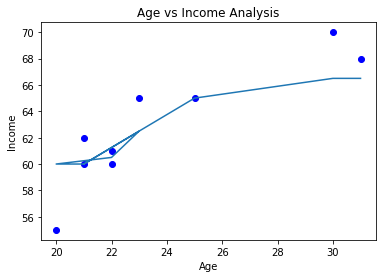

In [51]:
#BEST FIT LINE
#plt.plot(x, reg.predict(x))
plt.plot(x, df['predicted_income_knn'])
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.scatter(df['age'], df['Income(k)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Analysis')

### Comparision of deffernt approach:

In [52]:
print(f"Manual : {pred_22_manual}")
print(f"Linear Model : {pred_22_linear_model}")
print(f"KNN Model : {pred_22_knn_model}")

Manual : 60.970689655172414
Linear Model : [61.57843137]
KNN Model : [60.5]


## KNN for Classification – Implementation Guidelines
1. Import data set
2. Separate X and Y. (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier
5. Evaluate the Model by only Accuracy.
6. Apply KNN Classifier:

In [53]:
# Import Library
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Import Data
df = pd.read_csv('data\weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
# Split the data into features (X) and target (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

In [56]:
X.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [57]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
X_train.head()

,Height,Weight
5012,63.371459,128.118169
1319,70.404437,193.856769
6894,63.216965,142.426466
7690,65.939828,153.101529
8095,63.818819,126.739000


In [60]:
X_test.head()

,Height,Weight
4169,72.464760,225.633703
2850,70.569455,185.963995
2813,69.161404,175.296969
3238,67.396783,179.573295
2524,65.996464,183.470680


In [61]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Fitting and Evaluating the Model
# K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# make predictions on the test dataset
y_pred = knn.predict(X_test)

In [64]:
y_pred

array(['Male', 'Male', 'Female', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9049474094273471


### Let us have a look at the error rate for different k values

In [66]:
accuracy_val = [] #to store rmse values for different k
k_val = []


In [67]:
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    accuracy = accuracy_score(y_test, y_pred) #calculate accuracy
    accuracy_val.append(accuracy) #store accuracy values
    k_val.append(K)
    print('Accuracy value for k= ' , K , 'is:', accuracy)

Accuracy value for k=  1 is: 0.8749513050253214
Accuracy value for k=  2 is: 0.8745617452278924
Accuracy value for k=  3 is: 0.9049474094273471
Accuracy value for k=  4 is: 0.905726529022205
Accuracy value for k=  5 is: 0.9142968445656409
Accuracy value for k=  6 is: 0.9100116867939229
Accuracy value for k=  7 is: 0.917802882742501
Accuracy value for k=  8 is: 0.917413322945072
Accuracy value for k=  9 is: 0.9193611219322166
Accuracy value for k=  10 is: 0.9201402415270744
Accuracy value for k=  11 is: 0.9228671601090768
Accuracy value for k=  12 is: 0.9205298013245033
Accuracy value for k=  13 is: 0.9213089209193611
Accuracy value for k=  14 is: 0.9209193611219322
Accuracy value for k=  15 is: 0.9216984807167901
Accuracy value for k=  16 is: 0.9201402415270744
Accuracy value for k=  17 is: 0.9213089209193611
Accuracy value for k=  18 is: 0.9213089209193611
Accuracy value for k=  19 is: 0.9205298013245033
Accuracy value for k=  20 is: 0.9213089209193611


Text(0.5, 1.0, 'K vs Accuracy Analysis')

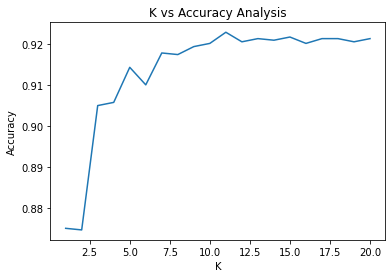

In [68]:
plt.plot(k_val, accuracy_val)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy Analysis')

## So K=15 is the best accuracy.

In [69]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9216984807167901
